# Autism Screening

Apply machine learning to the Autism-Adult-Data dataset to predict Autistic Spectrum Disorder (ASD).

<br>

Initial thoughts: <br>
*  Supervised learning
*  Binary classification: ASD 'YES' or 'NO'
*  Class imbalance: 'NO' the majority class
*  Scoring metric: I will make the assumption that the cost of false negatives is high, therefore I will score the models using __recall__ and __f1__ rather than accuracy
*  Quite a limited number of observation to train ML models.

In [1]:
# import main Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import json

# file paths
CWD = os.getcwd()
DATA_PATH = os.path.join(CWD, 'lcl_data')
    
print(f"'{DATA_PATH}'")

'/Users/hmrz/GitHub/Autism_Adult_Screening/lcl_data'


# Load and Explore

Load data, exploratory data analysis

In [2]:
# Load the data
fname = os.path.join(DATA_PATH, 'Autism-Adult-Data.csv')

df_raw = pd.read_csv(fname)

print(f"{df_raw.shape}")

df_raw.head()

(704, 20)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,f,NaN,no,no,Egypt,no,'18 and more',NaN,NO


In [3]:
# overview of attribute and target values
df_raw.describe(include='all')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
count,700.000000,701.000000,701.000000,701.000000,704.000000,702.000000,699.00000,703.000000,701.000000,703.000000,698.000000,701,604,700,699,700,701,700,607,704
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,11,2,2,67,2,1,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,White-European,no,no,'United States',no,'18 and more',Self,NO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366,231,631,609,113,689,700,520,515
mean,0.724286,0.453638,0.456491,0.495007,0.498580,0.284900,0.41774,0.648649,0.323823,0.574680,29.710602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.447193,0.498201,0.498459,0.500332,0.500353,0.451689,0.49354,0.477732,0.468268,0.494743,16.542781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# distribution of the target
df_raw['ASD'].value_counts()

NO     515
YES    189
Name: ASD, dtype: int64

In [5]:
# further inspection
df_raw.dtypes

# for c in df_raw.columns:
#     print(f"{c}:\n{df_raw[c].unique()}\n\n")

A1_Score           float64
A2_Score           float64
A3_Score           float64
A4_Score           float64
A5_Score             int64
A6_Score           float64
A7_Score           float64
A8_Score           float64
A9_Score           float64
A10_Score          float64
Age                float64
Gender              object
Ethnicity           object
Jundice             object
Family              object
Country_of_res      object
Used_app_before     object
Age_desc            object
Relation            object
ASD                 object
dtype: object

# Attributes and Targets

I will exclude a few attributes, such as 'Age description' (this data is already encoded in age), 'Used app before', etc.

I will perform some data transformation, e.g. to deal with NULL values, and encode other categorical values

In [6]:
# Copy raw data for futher processing
exclude_attributes = ['Country_of_res', 'Age_desc', 'Used_app_before']
attribute_list = [col for col in df_raw.columns if col not in exclude_attributes]

X = df_raw[attribute_list].copy()
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,White-European,no,no,Self,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,Latino,no,yes,Self,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,Latino,yes,yes,Parent,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,White-European,no,yes,Self,NO
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,f,NaN,no,no,NaN,NO


In [7]:
X.isnull().sum()

A1_Score       4
A2_Score       3
A3_Score       3
A4_Score       3
A5_Score       0
A6_Score       2
A7_Score       5
A8_Score       1
A9_Score       3
A10_Score      1
Age            6
Gender         3
Ethnicity    100
Jundice        4
Family         5
Relation      97
ASD            0
dtype: int64

### Categorical Attributes

All attributes except for age are categorical, age is numeric and discrete. It could also be treated as categorical and ordinal.

I will transform Gender, Jundice, Family, and Relation with simple mapping and one-hot-encode ethnicity.

I will explore how to deal with NULL values per attribute.
*  Relation: arbitrary encode 'self' with 0, 'Health care professional' with 2, and all others with 1. NULL values will be encoded like 'Other'
*  Ethnicity: a bit of quotation mark clean-up, NULL replaced by 'Others'
*  Gender encoded as 0 and 1
*  Yes and no encoded as 0 and 1.

In [8]:
# data transformation
dict_replace_ethnicity = {"'Middle Eastern '": 'Middle Eastern', 
                          "'South Asian'": 'South Asian',
                          'others': 'Others', 
                          np.nan: 'Others'}
dict_replace_gender = {'f': 0, 'm': 1}
dict_replace_relation = {'Self': 0, 
                         'Parent': 1, 
                         np.nan: 1, 
                         "'Health care professional'": 2, 
                         'Relative': 1, 
                         'Others': 1}   
dict_replace_yes_no = {'no': 0,'yes': 1}

# transform the data
X.replace({'Ethnicity': dict_replace_ethnicity,
           'Relation': dict_replace_relation,
           'Gender': dict_replace_gender,
           'Jundice': dict_replace_yes_no,
           'Family': dict_replace_yes_no,
           'Used_app_before': dict_replace_yes_no}, 
           inplace=True)

# replace missing age with mean - revisit this one later if necessary
X['Age'].fillna(27, inplace=True)
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,White-European,0.0,0.0,0,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,1.0,Latino,0.0,1.0,0,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,1.0,Latino,1.0,1.0,1,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,0.0,White-European,0.0,1.0,0,NO
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,0.0,Others,0.0,0.0,1,NO


In [9]:
X.isnull().sum()

A1_Score     4
A2_Score     3
A3_Score     3
A4_Score     3
A5_Score     0
A6_Score     2
A7_Score     5
A8_Score     1
A9_Score     3
A10_Score    1
Age          0
Gender       3
Ethnicity    0
Jundice      4
Family       5
Relation     0
ASD          0
dtype: int64

### One-hot-encoding

I will use one-hot-encoding for Ethnicity.

In [10]:
# import
from sklearn.preprocessing import OneHotEncoder

In [11]:
# transform / encode data
ohe = OneHotEncoder(sparse=False)
ohe_trans = ohe.fit_transform(X[['Ethnicity']])
ohe_df = pd.DataFrame(ohe_trans, columns=ohe.get_feature_names_out())

X = pd.concat([X, ohe_df], axis=1, copy=True)
X.drop('Ethnicity', axis=1, inplace=True)  

X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# check for remaining NULL values after transformation
X.isnull().sum()

A1_Score                    4
A2_Score                    3
A3_Score                    3
A4_Score                    3
A5_Score                    0
A6_Score                    2
A7_Score                    5
A8_Score                    1
A9_Score                    3
A10_Score                   1
Age                         0
Gender                      3
Jundice                     4
Family                      5
Relation                    0
ASD                         0
Ethnicity_Asian             0
Ethnicity_Black             0
Ethnicity_Hispanic          0
Ethnicity_Latino            0
Ethnicity_Middle Eastern    0
Ethnicity_Others            0
Ethnicity_Pasifika          0
Ethnicity_South Asian       0
Ethnicity_Turkish           0
Ethnicity_White-European    0
dtype: int64

In [13]:
# first attempt: drop all remaining observations, revisit if necessary
X.dropna(inplace=True)
X.shape

(668, 26)

In [14]:
# split attributes and targets
y = X['ASD'].copy()
X.drop('ASD', axis=1, inplace=True)

### Split into test and training datasets

In [15]:
# import
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"train: {X_train.shape}, {y_train.shape}; test: {X_test.shape}, {y_test.shape}\n")
print(f"target distribution: \ntrain \n{y_train.value_counts()}, \n\ntest \n{y_test.value_counts()}")

train: (501, 25), (501,); test: (167, 25), (167,)

target distribution: 
train 
NO     372
YES    129
Name: ASD, dtype: int64, 

test 
NO     117
YES     50
Name: ASD, dtype: int64


# Machine Learning

I will train a number of models using different algorithms and compare the results.

First attempt:
*  Logistic regression
*  Naive Bayes in different varieties
*  Random forest

### Model Assessment

Use recall-score, f1-score, and accuracy to assess the different models. I will use sklearn-build in confusion matrix and classification report for immediate assessment, but will also collect the metrics for final evaluation.

In [17]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [18]:
method_comparison = {'Model': [], 'Metric': [], 'Score': [],}
                     
def collect_method_scores(model, recall, f1, accuracy):
    method_comparison['Model'].append(model)
    method_comparison['Metric'].append('Recall')
    method_comparison['Score'].append(recall)
    method_comparison['Model'].append(model)
    method_comparison['Metric'].append('F1')
    method_comparison['Score'].append(f1)
    method_comparison['Model'].append(model)
    method_comparison['Metric'].append('Accuracy')
    method_comparison['Score'].append(accuracy)

### Logistic Regression

In [19]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

In [20]:
# class imbalance, pass class weight into the instance
class_weight = {'NO': 515, 'YES': 189}
log_reg_model = LogisticRegression(class_weight=class_weight, solver='liblinear')

In [21]:
# train
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight={'NO': 515, 'YES': 189}, solver='liblinear')

In [22]:
# use the unseen test dataset to assess the model
predictions = log_reg_model.predict(X_test)

In [23]:
# assess - confusion matrix
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), 
                                   index=['true No', 'true Yes'], 
                                   columns = ['pred No', 'pred Yes'])
print(df_confusion_matrix)

          pred No  pred Yes
true No       115         2
true Yes        0        50


In [24]:
# assess - sklearn classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          NO       1.00      0.98      0.99       117
         YES       0.96      1.00      0.98        50

    accuracy                           0.99       167
   macro avg       0.98      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167



In [25]:
# assess - for comparison and evaluation
collect_method_scores('Logistic Regression',
                      recall_score(y_test, predictions, average="binary", pos_label="NO"),
                      f1_score(y_test, predictions, average="binary", pos_label="NO"),
                      accuracy_score(y_test, predictions))

### Naive Bayes
Use four sklearn Naive Bayes models: Categorical, Gaussian, Multinomial, Complement, Bernoulli.

In [26]:
# import
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [27]:
# train, assess, and collect scores
nb_classifiers = [('Categorical', CategoricalNB),
                  ('Gaussian', GaussianNB), 
                  ('Multinomial', MultinomialNB), 
                  ('Complement', ComplementNB), 
                  ('Bernoulli', BernoulliNB),]

def train_test_naive_bayes(nb_name, nb_method, X_train, X_test, y_train, y_test):
    print(f"NAIVE BAYES: training and testing {nb_name} Naive Bayes\n")
    try:
        # instantiate
        naive_bayes_model = nb_method()
        #train
        naive_bayes_model.fit(X_train, y_train)
        # use the unseen test dataset to assess the model
        predictions = naive_bayes_model.predict(X_test)
        # assess - sklearn confusion matrix
        df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), 
                                           index=['true No', 'true Yes'], 
                                           columns = ['pred No', 'pred Yes'])
        print(df_confusion_matrix)
        print()
        # assess - sklearn classification report
        print(classification_report(y_test, predictions))
        # assess - for comparison and evaluation
        collect_method_scores(f"{nb_name} Naive Bayes",
                              recall_score(y_test, predictions, average="binary", pos_label="NO"),
                              f1_score(y_test, predictions, average="binary", pos_label="NO"),
                              accuracy_score(y_test, predictions))
    except Exception as e:
        print(f"exception '{e}'")
    
    print("\n\n")
    return
    
    
for nb_classifier in nb_classifiers:
    train_test_naive_bayes(*nb_classifier, X_train, X_test, y_train, y_test)

NAIVE BAYES: training and testing Categorical Naive Bayes

          pred No  pred Yes
true No       114         3
true Yes        2        48

              precision    recall  f1-score   support

          NO       0.98      0.97      0.98       117
         YES       0.94      0.96      0.95        50

    accuracy                           0.97       167
   macro avg       0.96      0.97      0.96       167
weighted avg       0.97      0.97      0.97       167




NAIVE BAYES: training and testing Gaussian Naive Bayes

          pred No  pred Yes
true No       109         8
true Yes        2        48

              precision    recall  f1-score   support

          NO       0.98      0.93      0.96       117
         YES       0.86      0.96      0.91        50

    accuracy                           0.94       167
   macro avg       0.92      0.95      0.93       167
weighted avg       0.94      0.94      0.94       167




NAIVE BAYES: training and testing Multinomial Naive Bay

### Random Forest

In [28]:
# import
from sklearn.ensemble import RandomForestClassifier

In [29]:
# class imbalance, pass class weight into the instance
class_weight = {'NO': 515, 'YES': 189}
random_forest = RandomForestClassifier(class_weight=class_weight)

In [30]:
# train
random_forest_model = random_forest.fit(X_train, y_train)

In [31]:
# use the unseen test dataset to assess the model
predictions = random_forest_model.predict(X_test)

In [32]:
# assess - confusion matrix
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), 
                                   index=['true No', 'true Yes'], 
                                   columns = ['pred No', 'pred Yes'])
print(df_confusion_matrix)

          pred No  pred Yes
true No       113         4
true Yes        2        48


In [33]:
# assess - sklearn classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          NO       0.98      0.97      0.97       117
         YES       0.92      0.96      0.94        50

    accuracy                           0.96       167
   macro avg       0.95      0.96      0.96       167
weighted avg       0.96      0.96      0.96       167



In [34]:
# assess - for comparison and evaluation
collect_method_scores('Random Forest',
                      recall_score(y_test, predictions, average="binary", pos_label="NO"),
                      f1_score(y_test, predictions, average="binary", pos_label="NO"),
                      accuracy_score(y_test, predictions))

# Compare Models

Quick visual comparison of the metrics for the trained models

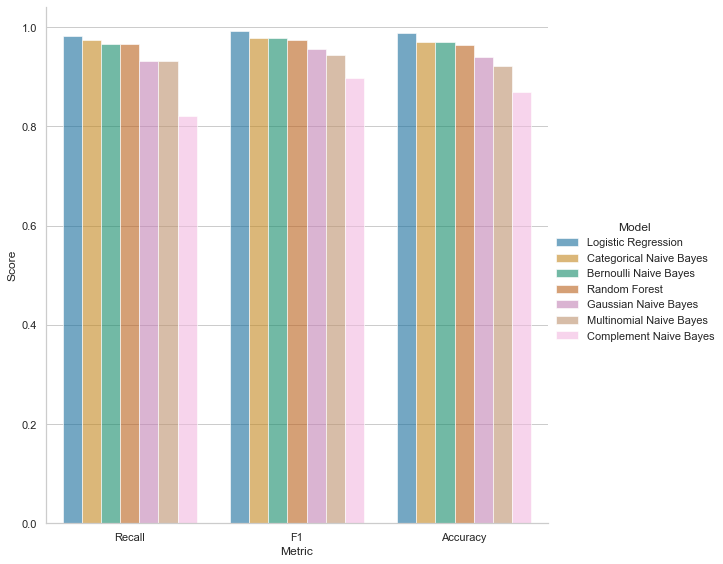

In [35]:
# metrics
method_comparison = pd.DataFrame(method_comparison)
method_comparison.sort_values(by=['Metric', 'Score'], ascending=[False, False], inplace=True)

# plot
sns.set_theme(style="whitegrid", palette="colorblind")

g = sns.catplot(
    data=method_comparison, kind="bar",
    x="Metric", y="Score", hue="Model",
    ci=None, alpha=.6, height=8
)
plt.show()

### SKLearn Naive Bayes

__Categorical Naive Bayes:__ <br>
CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature has its own categorical distribution.

<br>

__Bernoulli Naive Bayes:__ <br>
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e. each feature is assumed to be a binary-valued (Bernoulli, boolean) variable.

<br>

__Gaussian Naive Bayes:__ <br>
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

<br>

__Multinomial Naive Bayes:__ <br>
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data.

<br>

__Complement Naive Bayes__: <br>
ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets.

<br>

Source: __[Naive Bayes - scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html#)__

# Thank you

# Visual Analytics

Visual analytics on the raw data using Tableau, transform data to make it 'human readable' and download.

In [36]:
# process data for Tableau data visualisation
df_tableau = df_raw.copy()

df_tableau.drop('Age_desc', axis=1, inplace=True)

# fill missing age with mean - re-visit if necessary
df_tableau['Age'].fillna(27, inplace=True)

# data conversion
dict_replace_ethnicity = {"'Middle Eastern '": 'Middle Eastern', 
                          "'South Asian'": 'South Asian',
                          'others': 'Others', 
                          np.nan: 'Others'}
dict_replace_relation = {np.nan: 'Others', 
                         "'Health care professional'": 'Health care professional', }  
dict_replace_Ai = {0: 'no',
                   1: 'yes',
                   np.nan: 'n/a'}
dict_replace_gender = {'f': 'female',
                       'm': 'male'}
dict_replace_country = {"'United States'": 'United States', 
                        "'New Zealand'": 'New Zealand',
                        "'United Arab Emirates'": 'United Arab Emirates', 
                        "'United Kingdom'": 'United Kingdom', 
                        "'South Africa'": 'South Africa',
                        "'Saudi Arabia'": 'Saudi Arabia', 
                        "'Sri Lanka'": 'Sri Lanka', 
                        "'Sierra Leone'": 'Sierra Leone',
                        "'Viet Nam'": 'Viet Nam',
                        "'Costa Rica'": 'Costa Rica',
                        "'Hong Kong'": 'Hong Kong', 
                        "'Czech Republic'": 'Czech Republic'}
# --> a bit OCD in places I am afraid

# transform the data - this is for the Tableau visualisation specifically
df_tableau.replace({'A1_Score': dict_replace_Ai,
                 'A2_Score': dict_replace_Ai,
                 'A3_Score': dict_replace_Ai,
                 'A4_Score': dict_replace_Ai,
                 'A5_Score': dict_replace_Ai,
                 'A6_Score': dict_replace_Ai,
                 'A7_Score': dict_replace_Ai,
                 'A8_Score': dict_replace_Ai,
                 'A9_Score': dict_replace_Ai,
                 'A10_Score': dict_replace_Ai,
                 'Gender': dict_replace_gender,
                 'Ethnicity': dict_replace_ethnicity,
                 'Country_of_res': dict_replace_country,
                 'Relation': dict_replace_relation,}, 
                 inplace=True)

df_tableau.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Relation,ASD
0,yes,yes,yes,yes,no,no,yes,yes,no,no,26.0,female,White-European,no,no,United States,no,Self,NO
1,yes,yes,no,yes,no,no,no,yes,no,yes,24.0,male,Latino,no,yes,Brazil,no,Self,NO
2,yes,yes,no,yes,yes,no,yes,yes,yes,yes,27.0,male,Latino,yes,yes,Spain,no,Parent,YES
3,yes,yes,no,yes,no,no,yes,yes,no,yes,35.0,female,White-European,no,yes,United States,no,Self,NO
4,yes,no,no,no,no,no,no,yes,no,no,40.0,female,Others,no,no,Egypt,no,Others,NO


In [37]:
df_tableau.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
Age                0
Gender             3
Ethnicity          0
Jundice            4
Family             5
Country_of_res     4
Used_app_before    3
Relation           0
ASD                0
dtype: int64

In [38]:
df_tableau.dropna(inplace=True)
df_tableau.shape

(685, 19)

In [39]:
# write file
fname = os.path.join(DATA_PATH, 'tableau_vis.xlsx')
with pd.ExcelWriter(fname) as writer:
    df_tableau.to_excel(writer, sheet_name='PS Ai Lab', index=False)
print(f"'{fname}'")

'/Users/hmrz/GitHub/Autism_Adult_Screening/lcl_data/tableau_vis.xlsx'
